### packages

In [1]:
import numpy as np

import pandas as pd

from IPython.display import display

import networkx as nx

import matplotlib.pyplot as plt

import pulp

import copy

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

## concave function

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


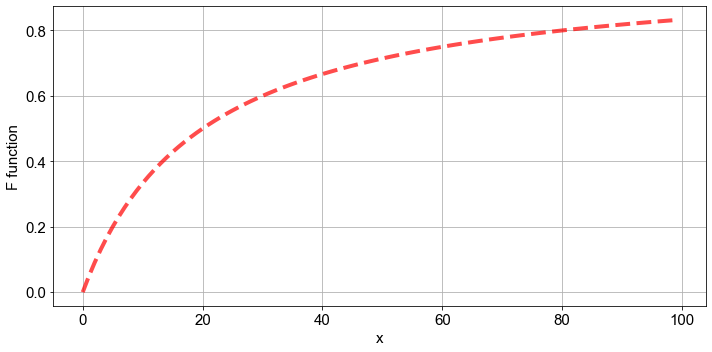

In [2]:
# 01 function

c=20

F=lambda x:x/(c+x)

x_array=np.arange(0,100,1)

f_array=F(x_array)


# 02 plot

figsize = 10,5

font_title = {'family' : 'Arial','weight' : 'normal','size': 15}

font_label = {'family' : 'Arial','weight' : 'normal','size': 15}

font_legend = {'family' : 'Arial','weight' : 'normal','size': 15}

figure, ax1 = plt.subplots(figsize=figsize)

labels = ax1.get_xticklabels() + ax1.get_yticklabels()

[label.set_fontsize(15) for label in labels]

[label.set_fontname('Arial') for label in labels]

ax1.plot(x_array,f_array,\
       color='r',\
       linestyle='--',\
       linewidth=4,\
       alpha=0.7)

ax1.set_ylabel('F function',font_label)

ax1.set_xlabel('x',font_label)

plt.grid()

plt.tight_layout()

current_fig = plt.gcf() # 'get current figure'

current_fig.savefig('26concave.eps', format='eps', dpi=1000, bbox_inches = 'tight')


plt.show()

### utility function 

\begin{equation}
u_{d,o}=\underbrace{\beta_{0,d} \cdot I_{o}}_{\textrm{order type}} +\underbrace{\beta_{1,d} \cdot f_{o}}_{\textrm{order fare}} - \underbrace{\beta_{2,d} \cdot \tau(l^{\textrm{org}}_{o},l_{d})}_{\textrm{pickup time}}  + \underbrace{\beta_{3,d} \cdot V(l^{\textrm{dest}}_{o})}_{\textrm{value of the order's destination}}
\label{eq:utility}
\end{equation}

In [20]:
# 01 numbers of orders and drivers

order_num=20

driver_num=5

# 02 type

type_array=np.ones([order_num,driver_num])

# 03 order price

np.random.seed(0)

price_array=np.zeros([order_num,driver_num])

price=np.random.randint(7,15,order_num)

for i in range(driver_num):
    
    price_array[:,i]=price
    
price_df=pd.DataFrame(price_array,columns=['d'+str(i+1) for i in range(driver_num)])

price_df.index=['o'+str(i+1) for i in range(order_num)]

display(price_df)
    
# 04 pick up distance 

distance_array=np.random.rand(order_num,driver_num)*3

# 05 the spatial value 

spatial_array=np.random.rand(order_num,driver_num)

# 06 utility function

beta_1 = 1

beta_2 = -0.4

beta_3 = 3.2

utility_array = type_array+beta_1*price_array-beta_2*distance_array+beta_3 *spatial_array

utility_df=pd.DataFrame(utility_array,columns=['d'+str(i+1) for i in range(driver_num)])

utility_df.index=['o'+str(i+1) for i in range(order_num)]

display(utility_df)

# decline utility

u_0=np.random.rand()*10

u_0


,d1,d2,d3,d4,d5
o1,11.0,11.0,11.0,11.0,11.0
o2,14.0,14.0,14.0,14.0,14.0
o3,12.0,12.0,12.0,12.0,12.0
o4,7.0,7.0,7.0,7.0,7.0
o5,10.0,10.0,10.0,10.0,10.0
o6,10.0,10.0,10.0,10.0,10.0
o7,10.0,10.0,10.0,10.0,10.0
o8,14.0,14.0,14.0,14.0,14.0
o9,8.0,8.0,8.0,8.0,8.0
o10,10.0,10.0,10.0,10.0,10.0


,d1,d2,d3,d4,d5
o1,14.380871,15.343182,14.919987,14.062514,14.689396
o2,16.373374,17.843792,17.859217,18.755341,18.260116
o3,16.495156,15.563228,16.613243,15.997404,14.498265
o4,10.708364,8.233442,10.098642,10.738773,9.425843
o5,13.295116,13.301140,11.980897,12.636624,12.846435
o6,13.631955,13.572356,13.830563,14.219228,13.198723
o7,14.300359,12.700636,13.231925,13.926425,14.379941
o8,18.057209,15.573185,18.097056,17.664086,18.632763
o9,10.162471,12.304325,10.706026,11.092244,9.646876
o10,13.907198,14.367151,13.125072,12.862559,11.514645


9.903389473967044

### selection probability

Thus, the problem can be the many-to-one matching problem with a non-linear objective:

\begin{equation}
\max  \pi = \sum_{o\in O}  \sum_{d\in D} p_{d,o} = \sum_{d\in D} \frac{\sum_{o\in O} u_{d,o} \cdot x_{d,o}}{u_{d,c}+\sum_{o\in O} u_{d,o} \cdot x_{d,o}}
\label{eq:objective of the disjoint menus}
\end{equation}
If we define
\begin{equation}
F_{d}(O_{d})=\frac{\sum_{o\in O_{d}} u_{d,o}}{u_{d,c}+\sum_{o\in O_{d}} u_{d,o} }
\label{eq: F function}
\end{equation}
where $O_{d}$ ($x_{d,o}=1,\forall o \in O_{d}$) is the order menu offered to driver $d$.

### The Continuous Greedy Algorithm


- Initialization let $\delta=\frac{1}{|O|\cdot|D|}$, $t=0$, and $x_{d,o}(t)=0, \forall d \in D,\forall o \in O$


- Marginal profit: let $O_{d}(t)$ be a random set containing each order $o$ independently with probability $x_{d,o}(t)$. For all $d,o$, estimate the expected marginal profit of driver $d$ from order $o$,

\begin{equation}
 w_{d,o}(t)=\textbf{E} [F_{d}(O_{d}(t) \cup \{o\}) - F_{d}(O_{d}(t)) ]
\end{equation}

by taking the average of $(|O|\cdot|D|)^{5}$ independent samples.


- Updating: for each order $o$, let $d_{o}(t) = \arg \max_{d} w_{d,o}(t) $  be the preferred driver for order. For the selected driver $d=d_{o}(t)$,
\begin{equation}
 x_{d,o}(t+\delta)=x_{d,o}(t)+\delta
\end{equation}
Otherwise
\begin{equation}
 x_{d,o}(t+\delta)=x_{d,o}(t)
\end{equation}

- Increment: let $t=t+\delta$ if $t<1$, go back to step 2.

- Allocation: allocate each order $o$ independently, with probability $x_{d,o}(1)$.


Allocation probabilities:


array([[0.17, 0.24, 0.23, 0.14, 0.22],
       [0.13, 0.2 , 0.21, 0.24, 0.22],
       [0.23, 0.21, 0.24, 0.19, 0.13],
       [0.28, 0.06, 0.23, 0.26, 0.17],
       [0.23, 0.25, 0.16, 0.15, 0.21],
       [0.19, 0.22, 0.2 , 0.22, 0.17],
       [0.24, 0.15, 0.17, 0.19, 0.25],
       [0.23, 0.1 , 0.23, 0.19, 0.25],
       [0.15, 0.32, 0.2 , 0.22, 0.11],
       [0.26, 0.29, 0.2 , 0.15, 0.1 ],
       [0.18, 0.13, 0.25, 0.2 , 0.24],
       [0.3 , 0.13, 0.16, 0.3 , 0.11],
       [0.27, 0.13, 0.18, 0.12, 0.3 ],
       [0.12, 0.2 , 0.31, 0.25, 0.12],
       [0.12, 0.24, 0.19, 0.15, 0.3 ],
       [0.2 , 0.22, 0.17, 0.24, 0.17],
       [0.14, 0.16, 0.09, 0.35, 0.26],
       [0.23, 0.22, 0.17, 0.17, 0.21],
       [0.22, 0.3 , 0.23, 0.17, 0.08],
       [0.08, 0.25, 0.18, 0.15, 0.34]])

Allocation binary decisions:


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

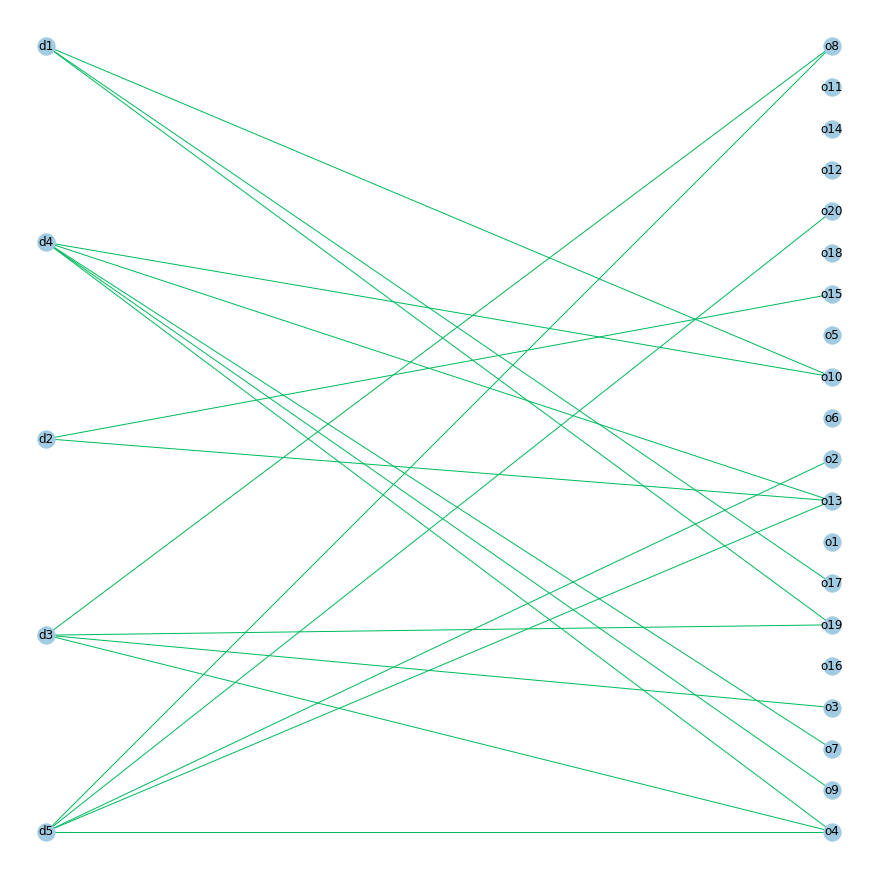

In [47]:
F=lambda d,menu: utility_array[menu,d].sum()/(utility_array[menu,d].sum()+u_0)

# 01 Initialization

delta=1./(order_num*driver_num)

t = 0

x = np.zeros([order_num,driver_num])

sample_times=(order_num*driver_num)*2

while t<1:
    

    # 02 Marginal profit
    
    w=np.zeros([order_num,driver_num])
    
    for i in range(sample_times):
        
        # 02-1 random sample of order set
        
        O=np.zeros([order_num,driver_num])
        
        for o in range(order_num):
            
            for d in range(driver_num):
                
                O[o][d]=np.random.choice([1,0],p=[x[o][d],1-x[o][d]])
                
        # marginal profit
        
        for d in range(driver_num):
            
            menu=np.where(O[:,d]==1)[0]
        
            for o in range(order_num):
                
                if o not in menu:
                    
                    new_menu=copy.deepcopy(menu)
                    
                    new_menu=np.append(new_menu,o)
                    
                else:
                    
                    new_menu=copy.deepcopy(menu)
                
                w[o][d]+=F(d,new_menu)-F(d,menu)
                
    w=w/sample_times

    
    # 03 Updating
    
    for o in range(order_num):
        
        selected_d=np.argmax(w[o,:])
        
        x[o][selected_d]+=delta
        
    # 04 Increment
        
    t+=delta
    
    
print('Allocation probabilities:')

display(x)  


# 05 Allocation

O=np.zeros([order_num,driver_num])
        
for o in range(order_num):

    for d in range(driver_num):

        O[o][d]=np.random.choice([1,0],p=[x[o][d],1-x[o][d]])
        
print('Allocation binary decisions:')

display(O)

# 06 Bipartite graph displaying

B = nx.Graph()

B.add_nodes_from(utility_df.columns, bipartite=0, label='driver')

B.add_nodes_from(utility_df.index, bipartite=1, label='order')

for o in range(order_num):

    for d in range(driver_num):
        
        if O[o][d]==1:

            B.add_edge('d'+str(d+1), 'o'+str(o+1))
    
    
left_or_top = utility_df.columns

pos = nx.bipartite_layout(B, left_or_top)

# Draw the graph

plt.figure(figsize=(12,12)) 

nx.draw(B,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)

plt.show()
